<a href="https://colab.research.google.com/github/tashir0605/Cocepts-And-Practice/blob/main/Pytorch/Training_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

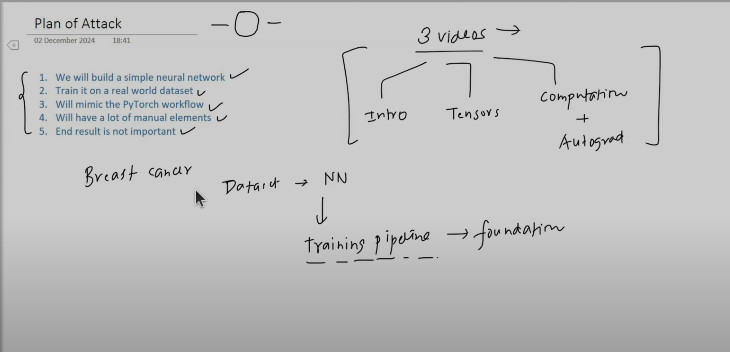


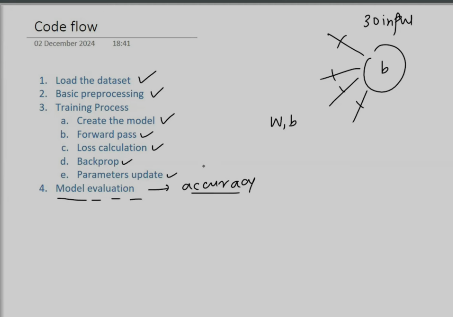

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("breast-cancer.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

In [ ]:
df.drop(columns=['id'],inplace=True)

In [ ]:
df.shape

(569, 31)

# 📊 Understanding `df.iloc[:, 1:]` and `df.iloc[:, 0]` in PyTorch/ML

## 🔹 `df.iloc[:, 1:]`
- Selects **all rows** and **all columns from index 1 onward**
- Basically, you're **dropping column at index 0** and taking the rest as **input features (X)**

## 🔹 `df.iloc[:, 0]`
- Selects **all rows** and only the **column at index 0**
- This becomes your **labels/target (y)**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1: ],df.iloc[:,0],test_size=0.2)

**SCaling**

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[-1.26058916, -0.52759551, -1.22539331, ..., -0.48478117,
         0.19679331,  0.85812524],
       [-0.59018018,  1.35807153, -0.57371916, ...,  0.10709993,
        -0.47081139, -0.06136252],
       [ 3.74891822,  1.68132874,  3.88598451, ...,  2.26670712,
        -0.39760148, -0.54272079],
       ...,
       [-0.83202234, -0.57912926, -0.86507505, ..., -1.10337281,
        -0.84731952, -0.74367619],
       [-0.32021683, -0.71967588, -0.34806118, ..., -0.11447608,
         0.8905444 ,  0.71733963],
       [-0.78140421, -0.01225793, -0.81080287, ..., -0.6606761 ,
        -0.81768694, -1.0018805 ]])

In [ ]:
X_test

array([[ 0.29282494,  2.51055375,  0.20567822, ..., -0.71925715,
         0.6343097 , -1.27994669],
       [ 0.28438859, -0.63300546,  0.32279186, ...,  0.44249922,
        -0.48649923, -0.33709202],
       [ 0.87493341,  1.27140112,  0.91937771, ...,  1.16489769,
         0.77375716,  2.94070076],
       ...,
       [-1.00637367,  0.25712308, -0.93975029, ..., -0.78588171,
        -0.84731952,  0.39137129],
       [ 0.25626741, -0.83914049,  0.23587477, ...,  0.37572289,
         0.1479867 ,  0.00348064],
       [-1.13573111, -0.3659669 , -1.11236029, ..., -0.73079124,
         0.04340111, -0.40427187]])

In [ ]:
y_train

,diagnosis
341,B
445,B
461,M
115,B
97,B
...,...
203,M
320,B
428,B
292,B


**Label Encoding**

## ✅ Use `fit_transform()` on `y_train`
→ It learns the label mapping and applies it.

## ✅ Use `transform()` on `y_test`
→ It only applies the mapping learned from `y_train`.

## ❌ Don’t use `fit_transform()` on `y_test`
→ It may create a different mapping, causing wrong predictions.

This avoids data leakage and keeps label encoding consistent.

In [ ]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

In [ ]:
y_train

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

# **Numpy arrays to Pytorch Tensors**

In [ ]:
X_train_tensor=torch.from_numpy(X_train)
X_test_tensor=torch.from_numpy(X_test)
y_train_tensor=torch.from_numpy(y_train)
y_test_tensor=torch.from_numpy(y_test)

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

In [ ]:
X_test_tensor.shape

torch.Size([114, 30])

In [ ]:
y_train_tensor.shape

torch.Size([455])

In [ ]:
y_test_tensor.shape

torch.Size([114])

# Defining the Model

In [ ]:
class MySimpleNN():
  # X.shape[1] will give the shape of X that is 569,30 and X.shape[1]= 31 after that 1 give 1  weight matrix =31*1 and dtype =float64 because x datatype is also float64
  def __init__(self,X):

    self.weights=torch.rand(X.shape[1],1,dtype=torch.float64)
    self.weights.requires_grad=True
    self.bias=torch.rand(1,dtype=torch.float64)
    self.bias.requires_grad=True

  def forward(self,X):
    z=torch.matmul(X,self.weights)+self.bias
    y_pred=torch.sigmoid(z)
    return y_pred

  def loss_function(self,y_pred,y):
    #clamp prediction to avoid log(0)
    epsilon=1e-7
    y_pred=torch.clamp(y_pred,epsilon,1-epsilon)

    #calculate loss for each training sample
    loss=-(y*torch.log(y_pred)+(1-y)*torch.log(1-y_pred)).mean()
    return loss

**Important Parameters**

In [ ]:
learning_rate=0.1
epochs=25

# Training Pipeline

In [ ]:
# create model

model= MySimpleNN(X_train_tensor)


# define loop
for epoch in range(epochs):
  # forward pass
  y_pred=model.forward(X_train_tensor)
  # print(y_pred)
  # loss calculate
  loss=model.loss_function(y_pred,y_train_tensor)
  # print(f"Epoch: {epoch} Loss: {loss}")

  #backward pass
  loss.backward()

  #parameters update
  # yahan pe jo hum weights update kr rhe hai wahan pe grdients ko track krne ki zarurat nhi hai
  with torch.no_grad():
    model.weights-=learning_rate*model.weights.grad
    model.bias-=learning_rate*model.bias.grad

#zero gradients
  model.weights.grad.zero_()
  model.bias.grad.zero_()

#print loss in each epoch
  print(f'Epoch:{epoch+1},Loss: {loss.item()}')


Epoch:1,Loss: 4.017565131887552
Epoch:2,Loss: 3.913663253636429
Epoch:3,Loss: 3.8074846802794498
Epoch:4,Loss: 3.698079080105993
Epoch:5,Loss: 3.589078012345356
Epoch:6,Loss: 3.4756774277755373
Epoch:7,Loss: 3.356003790781783
Epoch:8,Loss: 3.231311903112219
Epoch:9,Loss: 3.1033531081027257
Epoch:10,Loss: 2.975476886977352
Epoch:11,Loss: 2.842056592066537
Epoch:12,Loss: 2.7046173932948157
Epoch:13,Loss: 2.5636756021595337
Epoch:14,Loss: 2.4230489998831395
Epoch:15,Loss: 2.285277878657988
Epoch:16,Loss: 2.1451969255649574
Epoch:17,Loss: 2.0089043782690235
Epoch:18,Loss: 1.8758598015136574
Epoch:19,Loss: 1.7473158782092233
Epoch:20,Loss: 1.624799210583061
Epoch:21,Loss: 1.510237262667306
Epoch:22,Loss: 1.4059878340256644
Epoch:23,Loss: 1.3088378206273132
Epoch:24,Loss: 1.2207580173916421
Epoch:25,Loss: 1.1438887985008395


In [ ]:
model.bias

tensor([-0.0238], dtype=torch.float64, requires_grad=True)

# Evaluation

In [ ]:
# model_Evaluation

with torch.no_grad():
  y_pred=model.forward(X_test_tensor)
  y_pred=(y_pred>0.9).float()
  accuracy=(y_pred==y_test_tensor).float().mean()
  print(f'Accuracy:{accuracy.item()}')

Accuracy:0.5609418153762817


# By Using NN Module

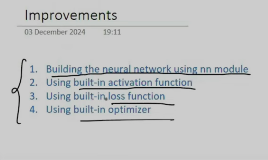

In [ ]:
import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [ ]:
learning_rate = 0.1
epochs = 25

In [ ]:
# define loss function
loss_function = nn.BCELoss()

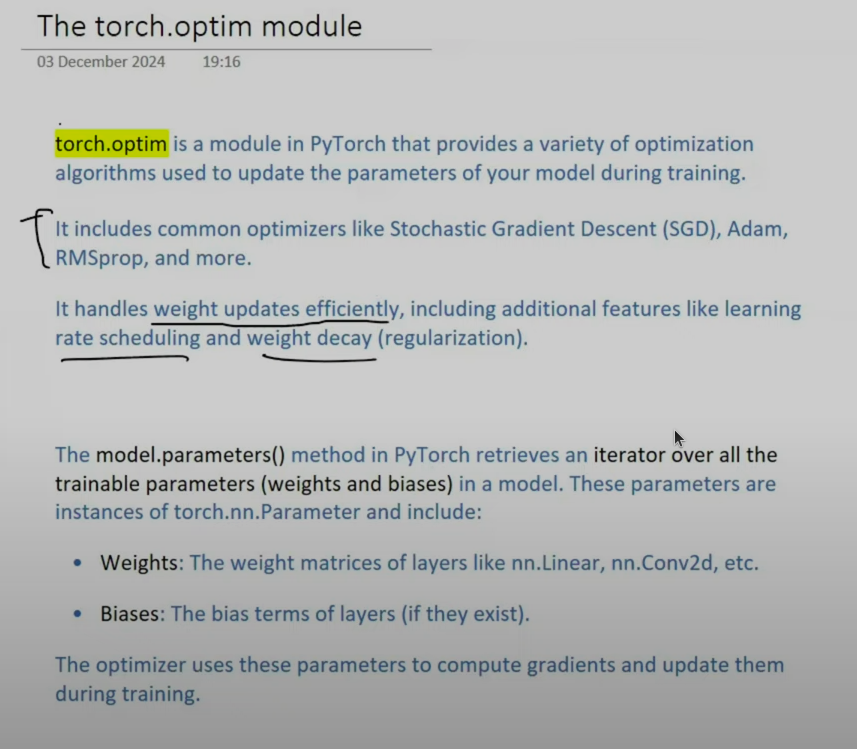

# Training Pipeline

In [ ]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculate
  # Reshaping the y_train_tensor
  loss = loss_function(y_pred, y_train_tensor.view(-1,1))

  # clear gradients
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # parameters update
  optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

In [ ]:
# model_Evaluation

with torch.no_grad():
  y_pred=model.forward(X_test_tensor)
  y_pred=(y_pred>0.9).float()
  accuracy=(y_pred==y_test_tensor).float().mean()
  print(f'Accuracy:{accuracy.item()}')